In [1]:
import numpy as np

#Load various data and functions
import fundamental_gates #Useful single qutrit gates
import interaction_and_decay #parameters - change dephasing rates in here
import embed_functions #functions to embed 1/2-qutrit objects into many-qutrit operators
import gate_sequences #gate sequences for various gates we've discussed - ZZ4 gate sequence is the one actually used in expt
import evolution #functions to calculate evolution of initial state under gate sequence
import teleport

import state_prep
import sim_tools

import testing_utils as test

import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

## $T_1$ testing

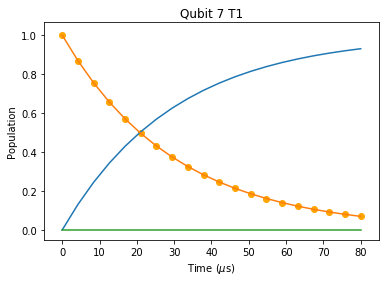

In [2]:
qubit_num = 7

min_delay = 0 #us
max_delay = 80 #us
n_pts = 20

times = np.linspace(min_delay, max_delay, n_pts)

simulated_populations = test.simulated_T1(qubit_num, times, EF=False)
ideal_populations = test.ideal_T1(qubit_num, times)
    
plt.plot(times, simulated_populations.T);
plt.scatter(times, ideal_populations, c='orange') 
plt.title('Qubit {} T1'.format(qubit_num))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population');

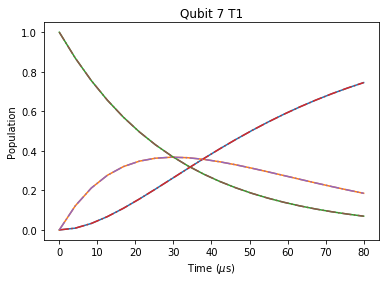

In [4]:
qubit_num = 7

min_delay, max_delay, n_pts = 0, 80, 20 # times in us
times = np.linspace(min_delay, max_delay, n_pts)

simulated_populations = test.simulated_T1(qubit_num,
                                times,
                                EF=True)
ideal_populations = test.ideal_T1EF(qubit_num, times)

plt.plot(times, simulated_populations.T);
plt.plot(times, ideal_populations, ls='-.')
plt.title('Qubit {} T1'.format(qubit_num))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population');

## Ramsey testing

In [2]:
reload(test)

<module 'testing_utils' from '/Users/qnl/Documents/Vinay/QNL/Code/qutrit_teleportation_simulation_042219/testing_utils.py'>

In [2]:
qubit_num = 5

min_delay = 0 #us
max_delay = 10 #us
n_pts = 300

times = np.linspace(min_delay, max_delay, n_pts)

simulated_populations = test.simulated_Ramsey(qubit_num, 
                                              times,
                                              subspace='GE')

ideal_populations = test.ideal_Ramsey(qubit_num, times)

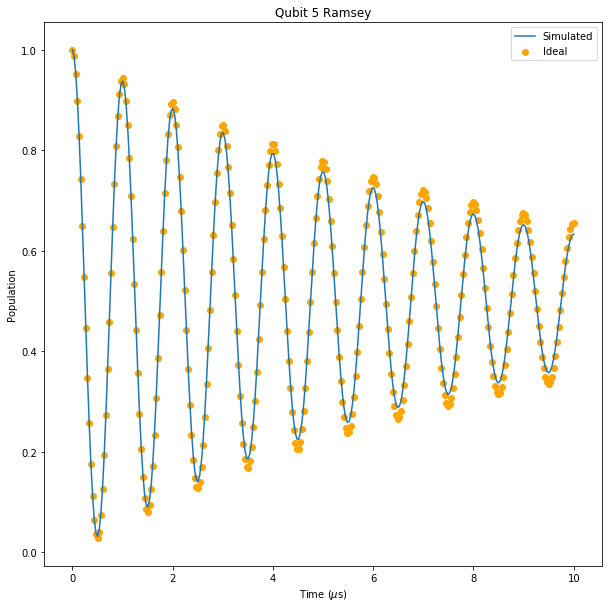

In [3]:
plt.figure(figsize=(10,10))
plt.plot(times, simulated_populations.T[:,1], label='Simulated');
plt.scatter(times, ideal_populations, c='orange', label='Ideal') 
plt.title('Qubit {} Ramsey'.format(qubit_num))
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Population');

plt.legend(loc=1)

## Depolarized EPR testing

In [2]:
test.test_EPR()

Failed to find a square root.
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.11111111 0.11111111 0.11111111 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.5263158  0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368        nan 0.89473684
 0.94736844 1.        ]


In [4]:
reload(testing_utils)

NameError: name 'reload' is not defined

## Scrambler testing

In [9]:
def scramble(i, j):
    return ((i-j) %3 , (2*i-j)%3)

def other_scramble(i, j):
    return (scramble(j,i)[1], scramble(j,i)[0])

In [8]:
[scramble(i,j) for i in range(3) for j in range(3)]

[(0, 0), (2, 2), (1, 1), (1, 2), (0, 1), (2, 0), (2, 1), (1, 0), (0, 2)]

In [10]:
[other_scramble(i,j) for i in range(3) for j in range(3)]

[(0, 0), (2, 1), (1, 2), (2, 2), (1, 0), (0, 1), (1, 1), (0, 2), (2, 0)]